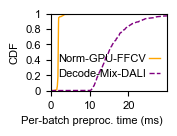

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fontsize=8

plt.rcParams["font.family"] = 'Arial'
linewidth=1

figure, axes = plt.subplots()
x_range = [0,0.03]
y_range = [0,1]
axes.set_xlim(x_range)
axes.set_ylim(y_range)
xticks = [0, 0.01, 0.02]
xtick_labels = ['0', 10, 20]
yticks = [0,0.2,0.4,0.6,0.8,1]
plt.xticks(xticks, xtick_labels, fontsize=fontsize)
plt.yticks(yticks, yticks, fontsize=fontsize)


filename = 'norm-ffcv.csv'
columns = ['prep_time']
df = pd.read_csv(filename, delimiter='\t', names=columns)
prep_time = [float(x) for x in df['prep_time'].to_list()]
prep_time.insert(0,0)
prep_time_sorted = np.sort(prep_time)
prep_time_cdf = np.arange(0, len(prep_time_sorted)) / float(len(prep_time_sorted)-1)
plt.plot(prep_time_sorted, prep_time_cdf, linewidth=linewidth, label='Norm-GPU-FFCV', color='orange')

filename = 'decode-dali.csv'
columns = ['prep_time']
df = pd.read_csv(filename, delimiter='\t', names=columns)
prep_time = [float(x) for x in df['prep_time'].to_list()]
prep_time.insert(0,0)
prep_time_sorted = np.sort(prep_time)
prep_time_cdf = np.arange(0, len(prep_time_sorted)) / float(len(prep_time_sorted)-1)
plt.plot(prep_time_sorted, prep_time_cdf, linewidth=linewidth, label='Decode-Mix-DALI', color='purple', ls="--")


plt.xlabel('Per-batch preproc. time (ms)', fontsize=fontsize, x=0.35)
plt.ylabel('CDF', fontsize=fontsize)
# plt.title('CDF of per-batch preproc. time', fontsize=fontsize, y=1.05)

plt.legend(fontsize=fontsize, markerfirst=False, borderpad=0.2,
           bbox_to_anchor=(0.5, 0.05),
           handlelength=1, handletextpad=0.3, frameon=False,
           loc="lower center")
figure.set_size_inches(1.5, 1)
figure.set_dpi(100)
plt.savefig('cdf.eps', bbox_inches='tight')

plt.show()